In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier

In [2]:
df = pd.read_csv("bank.csv")

In [3]:
for col in df.select_dtypes(include=["object"]).columns:
    df[col] = LabelEncoder().fit_transform(df[col])

In [4]:
X = df.drop(columns=["deposit"])  # 'deposit' is the target column
y = df["deposit"]

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [6]:
param_grid = {
    "max_depth": [3, 5, 10, None],
    "min_samples_split": [2, 5, 10]
}

In [7]:
dt = DecisionTreeClassifier(random_state=42)
grid_search = GridSearchCV(dt, param_grid, cv=5, scoring="accuracy")
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=42),
             param_grid={'max_depth': [3, 5, 10, None],
                         'min_samples_split': [2, 5, 10]},
             scoring='accuracy')

In [8]:
best_params = grid_search.best_params_
print("Best Pre-Pruning Parameters:", best_params)

Best Pre-Pruning Parameters: {'max_depth': 10, 'min_samples_split': 10}


In [9]:
clf = DecisionTreeClassifier(**best_params, random_state=42)
path = clf.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas = path.ccp_alphas[:-1]  # Remove max value

In [10]:
train_scores = []
for alpha in ccp_alphas:
    pruned_tree = DecisionTreeClassifier(**best_params, ccp_alpha=alpha, random_state=42)
    scores = cross_val_score(pruned_tree, X_train, y_train, cv=5, scoring="accuracy")
    train_scores.append(scores.mean())

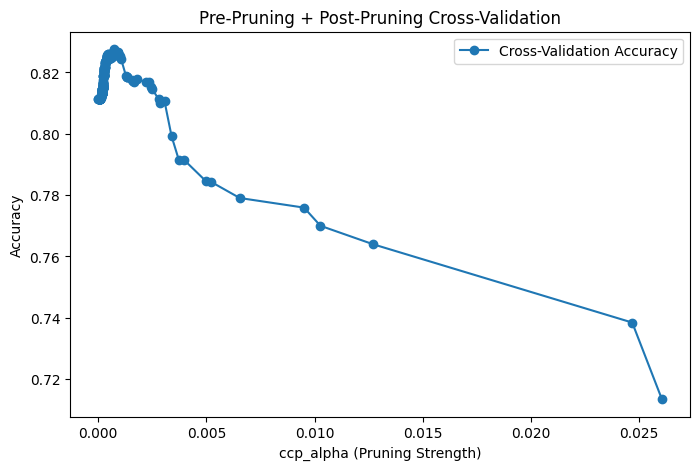

In [11]:
plt.figure(figsize=(8, 5))
plt.plot(ccp_alphas, train_scores, marker="o", label="Cross-Validation Accuracy")
plt.xlabel("ccp_alpha (Pruning Strength)")
plt.ylabel("Accuracy")
plt.legend()
plt.title("Pre-Pruning + Post-Pruning Cross-Validation")
plt.show()

In [12]:
best_ccp_alpha = ccp_alphas[np.argmax(train_scores)]
final_tree = DecisionTreeClassifier(**best_params, ccp_alpha=best_ccp_alpha, random_state=42)
final_tree.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=np.float64(0.000740704733982557), max_depth=10,
                       min_samples_split=10, random_state=42)

In [13]:
print("Best ccp_alpha:", best_ccp_alpha)

Best ccp_alpha: 0.000740704733982557
